# Python Homework 5: Financial Credit Rating

<font color="blue"><b>Instruction:</b> Please upload your jupyter notebook on GauchoSpace with filename "PythonHW5_<i>YOURPERMNUMBER</i>.ipynb".</font>


In Mathematical Finance, Markov chains are typically used to model the default risk of a company or country (more specifically, the default of a company's or country's liability like a corporate or government bond - see PSTAT 171 and PSTAT 170). 

Rating agencies (like <i>Standard & Poor’s</i>, <i>Moody’s</i>, <i>Fitch</i>) rate the financial stability of a company and classify them according to different classes. A possible classification may range from 'AAA' for debitors with a very good credit rating to 'CCC' for debitors which are very likely to delay in paying a debt; and 'D' for those debitors which can't satisfy their financial liabilities anymore (in other words, they are default). 

The yearly credit rating of a company can be modeled as a Markov chain $(X_n)_{n=0,1,2,\ldots}$ with state space


$$ \mathcal{S} = \{ AAA,\, AA,\, A,\, BBB,\, BB,\, B,\, CCC,\, D \} $$

where $X_n$ represents the credit rating class of a company at the $n$-th year. The transition probabilities are given by

\begin{equation*}
\begin{array}{ccccccccc}
 & AAA & AA & A & BBB & BB & B & CCC & D \\
 AAA & 92,07 & 7,09 & 0,63 & 0,15 & 0,06 & 0,00 & 0,00 & 0,00 \\ 
 AA & 0,62 & 90,84 & 7,76 & 0,59 & 0,06 & 0,10 & 0,02 & 0,01 \\
 A & 0,05 & 2,09 & 91,38 & 5,79 & 0,44 & 0,16 & 0,04 & 0,05 \\
 BBB & 0,03 & 0,21 & 4,10 & 89,37 & 4,82 & 0,86 & 0,24 & 0,37 \\
 BB & 0,03 & 0,08 & 0,40 & 5,54 & 83,24 & 8,15 & 1,11 & 1,45 \\
 B & 0,00 & 0,08 & 0,27 & 0,34 & 5,39 & 82,41 & 4,92 & 6,59 \\
 CCC & 0,10 & 0,00 & 0,29 & 0,58 & 1,55 & 10,54 & 52,80 & 34,14 \\
 D & 0,00 & 0,00 & 0,00 & 0,00 & 0,00 & 0,00 & 0,00 & 100,0
\end{array} 
\end{equation*}

<i>Remark</i>: For your implementations below, you can label the different states from $0$ to $7$, where $0$ represents state $AAA$, $1$ represents state $AA$, and so on.

As usual, we start with loading some packages:

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import csv

# Allows to render plots directly within the notebook
%matplotlib inline

## Problem 1 (3 points)

We start with loading the matrix from the accompanying external .csv-file.

In [3]:
csvFile = 'CreditRatingTransMatrixP.csv'   #specify the path to your csv file

P = []
with open( csvFile, 'r' ) as file:
    reader = csv.reader( file )
    for row in reader:
        P.append( [ float( prob ) for prob in row ] )

P is a list representing the transition probability matrix. In particular, $P[i][j]$ gives you the probabilities from state $i$ to $j$, for $i,j\in\{0,1,2,\dots, 7\}$. There are many other ways to read and store the transition matrix, e.g., you could also try 'pandas'.

In [4]:
### Check if you uploaded matrix P correctly
P # P is 8 x 8 matrix

[[0.9207, 0.0709, 0.0063, 0.0015, 0.0006, 0.0, 0.0, 0.0],
 [0.0062, 0.9084, 0.0776, 0.0059, 0.0006, 0.001, 0.0002, 0.0001],
 [0.0005, 0.0209, 0.9138, 0.0579, 0.0044, 0.0016, 0.0004, 0.0005],
 [0.0003, 0.0021, 0.041, 0.8937, 0.0482, 0.0086, 0.0024, 0.0037],
 [0.0003, 0.0008, 0.004, 0.0554, 0.8324, 0.0815, 0.0111, 0.0145],
 [0.0, 0.0008, 0.0027, 0.0034, 0.0539, 0.8241, 0.0492, 0.0659],
 [0.001, 0.0, 0.0029, 0.0058, 0.0155, 0.1054, 0.528, 0.3414],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]

In [5]:
### E.g. probabilities from state 0 to 0, 1, ..., 7
P[0][:]

[0.9207, 0.0709, 0.0063, 0.0015, 0.0006, 0.0, 0.0, 0.0]

<b>Question:</b> Use suitable Matrix operations to <u>compute the probability</u> that a company which is rated with 'AAA' today will <u>not</u> default during the next 8 years. Give a short explanation to your answer!

In [6]:
# Author: Sean Han Byul Lee, perm# 7315641

### Provide your computations here
def get_X_n(TransMat, n):
    return np.linalg.matrix_power(TransMat, n) # function to get P^n

X_8 = get_X_n(P, 8)

default_prob_of_AAA_in_n_years = X_8[0][:][len(X_8) - 1]
1 - default_prob_of_AAA_in_n_years

0.9982299711480223

Provide your short explanation here: The first row of X_8 gives us the status of the next 8 years of a company which is rated with 'AAA' today. 
Probability of the company won't default next 8 years = 1 - the company becomes default next 8 years.

<b>Answer:</b> 0.9982299711480223

## Problem 2 (4 points)

Write a Python code to simulate the Markov chain for different starting values:

<i>Hint:</i> You can use the numpy built-in function <tt>random.choice()</tt>!

In [7]:
def simulateRating(startRating, numberOfSteps, P):

    samplePath = [startRating]
    seq = np.arange(0,len(P))        # possible indices of ranks
    
    for i in range(numberOfSteps):
        randchoice = np.random.choice(seq, p = get_X_n(P, i)[samplePath[len(samplePath) - 1]][:])
        samplePath.append(randchoice) # keep updating P^n and also get the possible rank of next year from updated P^n
    
    return samplePath

In [9]:
### Test your code here:
simulateRating(startRating=0, numberOfSteps=10, P=P)

[0, 0, 0, 0, 1, 1, 2, 2, 3, 0, 0]

## Problem 3 (3 points)

Write a code to plot <tt>numPaths</tt> simulated paths of length <tt>lengthPath</tt> with starting value <tt>startRating</tt>.

In [10]:
### Write your own code here to simulate the paths

startRating = 2            
lengthPath = 50
numPaths = 2

### Insert your code here

simPathList = []
for i in range(numPaths):
    simPathList.append(simulateRating(startRating, lengthPath, P))

([<matplotlib.axis.YTick at 0x24d8e4e4160>,
 <a list of 10 Text yticklabel objects>)

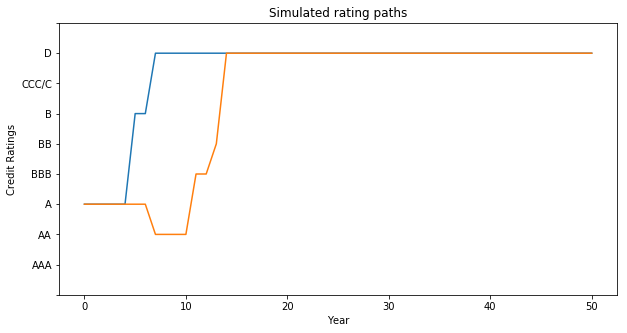

In [11]:
### Complement the plot commands accordingly and plot your results

plt.figure( figsize=( 10, 5 ) )
plt.plot(simPathList[0])
plt.plot(simPathList[1])

plt.title('Simulated rating paths')

plt.ylabel('Credit Ratings')
plt.xlabel('Year')

plt.ylim( -1, 8 )
ratings = [ '', 'AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC/C', 'D', '' ]
plt.yticks( range( -1, 9 ), ratings )

## Problem 4 (for fun)

Can you say something about the long run behavior of the Markov chain? Does it depend on today's starting rate at time $0$?

Justify your answer with a plot and/or computations!

<b>Answer</b>: Over the years, the company's probability of getting bankrupted is getting higher, and no matther what the start rating is, the Markov Chain behaves independent to the initial distribution. As you can see the simulations below, no matter what startRating, which is initial distribution, is, at the end, it all converges to bankrupcy.

([<matplotlib.axis.YTick at 0x24d8e66d978>,
 <a list of 10 Text yticklabel objects>)

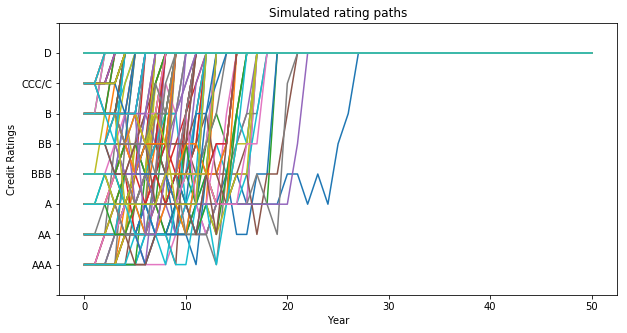

In [13]:
### Provide your computations here

simPathList = []
numberOfSteps = 50

for startRating in range(0,8):    # starting at different ratings from AAA all the way to D
    for numPaths in range(20):    # 20 samples for each rating
        simPathList.append(simulateRating(startRating, numberOfSteps, P))

plt.figure( figsize=( 10, 5 ) )
for i in range(len(simPathList)):
    plt.plot(simPathList[i])

plt.title('Simulated rating paths')

plt.ylabel('Credit Ratings')
plt.xlabel('Year')

plt.ylim( -1, 8 )
ratings = [ '', 'AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC/C', 'D', '' ]
plt.yticks( range( -1, 9 ), ratings )